In [1]:
from IPython.display import display,Image,clear_output
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import seaborn as sns
import random
import urllib.request
import h5py

from collections import Counter,defaultdict

In [2]:
import keras 
from keras.utils.data_utils import get_file  #?
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3  #?
from keras.applications.imagenet_utils import preprocess_input, decode_predictions  #?
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras.models import save_model

c:\users\rishabh\.conda\envs\tensorflow1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\rishabh\.conda\envs\tensorflow1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\rishabh\.conda\envs\tensorflow1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\rishabh\.conda\envs\tensorfl

In [3]:
from keras import backend as K
K.backend()

'tensorflow'

### Using tensorflow as backend

In [4]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [5]:
# from Keras GitHub  
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

### Creating instances of model

In [6]:
vgg16 = VGG16(weights='imagenet')     # weights -> None,'imagenet' **None** implies random initialization while 'imagenet' species loading
                                      # weights pretrained on imagenet
resnet50 = ResNet50(weights='imagenet')
vgg19 = VGG19(weights='imagenet')
inception = InceptionV3(weights='imagenet')

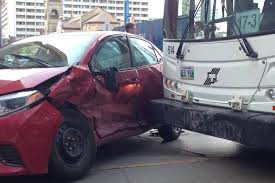

In [7]:
dataset = './car-damage-dataset/data1a/training/00-damage'
images = os.listdir(dataset)
img = random.choice(images)
dest_path = os.path.join(dataset,img)
Image(dest_path,width=200)

In [8]:
def prepare_image(img_path):
    img = load_img(path=img_path,target_size=(224,224))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)         #?
    return x

In [9]:
y = prepare_image(dest_path)
preds = vgg16.predict(y)
print(get_predictions(preds,top=5))

[[('n03770679', 'minivan', 0.22190587), ('n03670208', 'limousine', 0.12737624), ('n03769881', 'minibus', 0.10533137), ('n03445924', 'golfcart', 0.060823027), ('n04461696', 'tow_truck', 0.058661807)]]


In [10]:
preds = resnet50.predict(y)
print(get_predictions(preds,top=5))

[[('n04461696', 'tow_truck', 0.24170645), ('n03796401', 'moving_van', 0.08228182), ('n02701002', 'ambulance', 0.05497893), ('n02704792', 'amphibian', 0.050000772), ('n04285008', 'sports_car', 0.046804365)]]


In [11]:
preds = vgg19.predict(y)
print(get_predictions(preds,top=5))

[[('n03770679', 'minivan', 0.22958934), ('n03769881', 'minibus', 0.13515152), ('n04285008', 'sports_car', 0.08773174), ('n02917067', 'bullet_train', 0.049825553), ('n04461696', 'tow_truck', 0.039398458)]]


### Using VGG16 as gate (also check ResNet50)

In [12]:
vgg16.save('vgg16.h5')

In [13]:
img_list = os.listdir('./car-damage-dataset/data1a/training/')
# sab uttana h ki training
img_list

['00-damage', '01-whole']

In [35]:
img_paths = []
for x in img_list:
    img_paths += os.listdir('./car-damage-dataset/data1a/training/' + x)
    #print (img_paths)
    #print (x)
img_paths[:len(os.listdir('./car-damage-dataset/data1a/training/01-whole/'))] = ['./car-damage-dataset/data1a/training/00-damage/' + x for x in img_paths[:len(os.listdir('./car-damage-dataset/data1a/training/00-damage/'))]]
img_paths[len(os.listdir('./car-damage-dataset/data1a/training/00-damage//')):] = ['./car-damage-dataset/data1a/training/01-whole/' + x for x in img_paths[len(os.listdir('./car-damage-dataset/data1a/training/01-whole//')):]]
img_paths
#os.listdir('./car-damage-dataset/data1a/training/01-whole')
#print (len(img_paths))

['./car-damage-dataset/data1a/training/00-damage/0001.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0002.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0003.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0004.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0005.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0006.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0007.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0008.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0009.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0010.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0011.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0012.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0013.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0014.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0015.JPEG',
 './car-damage-dataset/data1a/training/00-damage/0016.JPEG',
 './car-damage-dataset/d

In [33]:
def get_car_categories():
    d = defaultdict(float)
    # img_list = os.listdir('./car-damage-dataset/data1a/training/')    # cross-check the path
    for i,img_path in enumerate(img_paths):
        img = prepare_image(img_path)
        out = vgg16.predict(img)
        top = get_predictions(out,top=5)
        for j in top[0]:
            d[j[0:2]] += j[2]
        if i % 50 == 0:
            print(i, '/', len(img_paths), 'complete')
    return Counter(d)

In [36]:
cat_counter = get_car_categories()

0 / 1840 complete
50 / 1840 complete
100 / 1840 complete
150 / 1840 complete
200 / 1840 complete
250 / 1840 complete
300 / 1840 complete
350 / 1840 complete
400 / 1840 complete
450 / 1840 complete
500 / 1840 complete
550 / 1840 complete
600 / 1840 complete
650 / 1840 complete
700 / 1840 complete
750 / 1840 complete
800 / 1840 complete
850 / 1840 complete
900 / 1840 complete
950 / 1840 complete
1000 / 1840 complete
1050 / 1840 complete
1100 / 1840 complete
1150 / 1840 complete
1200 / 1840 complete
1250 / 1840 complete
1300 / 1840 complete
1350 / 1840 complete
1400 / 1840 complete
1450 / 1840 complete
1500 / 1840 complete
1550 / 1840 complete
1600 / 1840 complete
1650 / 1840 complete
1700 / 1840 complete
1750 / 1840 complete
1800 / 1840 complete


In [37]:
cat_counter

Counter({('n01665541', 'leatherback_turtle'): 0.06195496767759323,
         ('n01774750', 'tarantula'): 0.06347669661045074,
         ('n01833805', 'hummingbird'): 0.5929096937179565,
         ('n01871265', 'tusker'): 0.07490918040275574,
         ('n01910747', 'jellyfish'): 0.10533314943313599,
         ('n01968897', 'chambered_nautilus'): 0.06782599538564682,
         ('n02066245', 'grey_whale'): 0.3129855580627918,
         ('n02071294', 'killer_whale'): 0.11351842060685158,
         ('n02280649', 'cabbage_butterfly'): 0.002053056377917528,
         ('n02437616', 'llama'): 0.07838265597820282,
         ('n02504013', 'Indian_elephant'): 0.15141189098358154,
         ('n02640242', 'sturgeon'): 0.10632297024130821,
         ('n02641379', 'gar'): 0.03511529788374901,
         ('n02687172', 'aircraft_carrier'): 0.2053634412586689,
         ('n02692877', 'airship'): 0.2524249851703644,
         ('n02699494', 'altar'): 0.05904679372906685,
         ('n02701002', 'ambulance'): 12.2531401549

In [38]:
cat_list = [k for k, v in cat_counter.most_common()[:48]]

In [39]:
cat_counter.most_common()[:48]

[(('n03770679', 'minivan'), 256.3005418772982),
 (('n04285008', 'sports_car'), 151.62893703579903),
 (('n03100240', 'convertible'), 119.63730248785578),
 (('n02814533', 'beach_wagon'), 100.13667983426421),
 (('n03930630', 'pickup'), 98.92791102593765),
 (('n03670208', 'limousine'), 88.42156428657472),
 (('n04461696', 'tow_truck'), 64.93725545681082),
 (('n03594945', 'jeep'), 54.6233667783672),
 (('n04037443', 'racer'), 54.501031141815474),
 (('n02974003', 'car_wheel'), 45.19216903267079),
 (('n03459775', 'grille'), 37.70207417594429),
 (('n04252225', 'snowplow'), 35.19272298034048),
 (('n03769881', 'minibus'), 32.94666991714621),
 (('n02930766', 'cab'), 30.680188228259794),
 (('n03796401', 'moving_van'), 23.899801764113363),
 (('n03977966', 'police_van'), 21.69497528980719),
 (('n03445924', 'golfcart'), 18.265433740103617),
 (('n03417042', 'garbage_truck'), 17.578994824085385),
 (('n02701002', 'ambulance'), 12.253140154993162),
 (('n03791053', 'motor_scooter'), 11.640076475217938),
 ((

In [40]:
cat_list

[('n03770679', 'minivan'),
 ('n04285008', 'sports_car'),
 ('n03100240', 'convertible'),
 ('n02814533', 'beach_wagon'),
 ('n03930630', 'pickup'),
 ('n03670208', 'limousine'),
 ('n04461696', 'tow_truck'),
 ('n03594945', 'jeep'),
 ('n04037443', 'racer'),
 ('n02974003', 'car_wheel'),
 ('n03459775', 'grille'),
 ('n04252225', 'snowplow'),
 ('n03769881', 'minibus'),
 ('n02930766', 'cab'),
 ('n03796401', 'moving_van'),
 ('n03977966', 'police_van'),
 ('n03445924', 'golfcart'),
 ('n03417042', 'garbage_truck'),
 ('n02701002', 'ambulance'),
 ('n03791053', 'motor_scooter'),
 ('n03478589', 'half_track'),
 ('n02704792', 'amphibian'),
 ('n04252077', 'snowmobile'),
 ('n04467665', 'trailer_truck'),
 ('n03777568', 'Model_T'),
 ('n02965783', 'car_mirror'),
 ('n02917067', 'bullet_train'),
 ('n04065272', 'recreational_vehicle'),
 ('n03345487', 'fire_engine'),
 ('n04465501', 'tractor'),
 ('n03127747', 'crash_helmet'),
 ('n03891332', 'parking_meter'),
 ('n02747177', 'ashcan'),
 ('n04389033', 'tank'),
 ('n0364

### Load Pickle Point

In [41]:
with open('cat_counter.pk','wb') as f:
    pickle.dump(cat_counter,f,-1)

In [42]:
with open('cat_counter.pk','rb') as f:
    cat_counter = pickle.load(f)

In [43]:
cat_list = [k for k,v in cat_counter.most_common()[:48]]

In [44]:
cat_list

[('n03770679', 'minivan'),
 ('n04285008', 'sports_car'),
 ('n03100240', 'convertible'),
 ('n02814533', 'beach_wagon'),
 ('n03930630', 'pickup'),
 ('n03670208', 'limousine'),
 ('n04461696', 'tow_truck'),
 ('n03594945', 'jeep'),
 ('n04037443', 'racer'),
 ('n02974003', 'car_wheel'),
 ('n03459775', 'grille'),
 ('n04252225', 'snowplow'),
 ('n03769881', 'minibus'),
 ('n02930766', 'cab'),
 ('n03796401', 'moving_van'),
 ('n03977966', 'police_van'),
 ('n03445924', 'golfcart'),
 ('n03417042', 'garbage_truck'),
 ('n02701002', 'ambulance'),
 ('n03791053', 'motor_scooter'),
 ('n03478589', 'half_track'),
 ('n02704792', 'amphibian'),
 ('n04252077', 'snowmobile'),
 ('n04467665', 'trailer_truck'),
 ('n03777568', 'Model_T'),
 ('n02965783', 'car_mirror'),
 ('n02917067', 'bullet_train'),
 ('n04065272', 'recreational_vehicle'),
 ('n03345487', 'fire_engine'),
 ('n04465501', 'tractor'),
 ('n03127747', 'crash_helmet'),
 ('n03891332', 'parking_meter'),
 ('n02747177', 'ashcan'),
 ('n04389033', 'tank'),
 ('n0364

In [45]:
with open('vgg16_cat_list.pk','wb') as f:
    pickle.dump(cat_list,f,-1)

### Evaluating Car Categories from Imagenet

In [46]:
def get_car_categories_with_cat_list(cat_list):
    num = 0
    bad_list = []
    for i,img_path in enumerate(img_paths):
        img = prepare_image(img_path)
        out = vgg16.predict(img)
        top = get_predictions(out,top=5)
        for j in top[0]:
            if j[0:2] in cat_list:
                num += 1
                break # breaks out of for loop if one of top 50 categories is found
            bad_list.append(img_path)  # appends to "bad list" if none of the 50 are found
        if i % 100 == 0:
            print(i, '/', len(img_paths), 'complete')
    bad_list = [k for k, v in Counter(bad_list).iteritems() if v == 5]   #?
    return num, bad_list

In [47]:
number, bad_list = get_car_categories_with_cat_list(cat_list)

0 / 1840 complete
100 / 1840 complete
200 / 1840 complete
300 / 1840 complete
400 / 1840 complete
500 / 1840 complete
600 / 1840 complete
700 / 1840 complete
800 / 1840 complete
900 / 1840 complete
1000 / 1840 complete
1100 / 1840 complete
1200 / 1840 complete
1300 / 1840 complete
1400 / 1840 complete
1500 / 1840 complete
1600 / 1840 complete
1700 / 1840 complete
1800 / 1840 complete


AttributeError: 'Counter' object has no attribute 'iteritems'

## Select top 50 as cutoff for category list

In [48]:
def view_images(img_paths):
    for img in img_paths:
        clear_output()
        display(Image(img,width=200))
        num = input("c to continue, q to quit")
        if num == 'c':
            pass
        else:
            return 'Finished for now.'

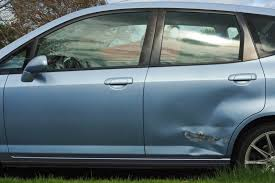

c to continue, q to quitq


'Finished for now.'

In [49]:
view_images(img_paths)

In [50]:
def car_categories_gate(img_url,cat_list):
    urllib.request.urlretrieve(img_url,'save.jpg')
    x = prepare_image('save.jpg')
    out = vgg16.predict(x)
    top = get_predictions(out,top=5)
    print("Validating that this is a picture of your car...")
    for j in top[0]:
        if j[0:2] in cat_list:
            print(j[0:2])
            return "Validation complete - proceed to damage evaluation"
    return "Are you sure this is a picture of your car? Please take another picture \
(try a different angle or lighting) and try again."

In [53]:
car_categories_gate('https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcSxhKhaSwPgdQkrDegC6sbUALBF9SiW6tDKg6dLDYj83e19krxy', cat_list)

HTTPError: HTTP Error 404: Not Found

In [54]:
car_categories_gate('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7xHO3j12Xk4q4eaQUL1A02k1HrJ9G_RY6tj-4h-07EfdML6YL', cat_list)

Validating that this is a picture of your car...
('n02747177', 'ashcan')


'Validation complete - proceed to damage evaluation'